In [1]:
import tensorflow as tf

In [2]:
hello = tf.constant("hello world")

In [3]:
sess = tf.Session()

In [4]:
print(sess.run(hello))

b'hello world'


# Creating Manual Neural Network

In [5]:
class SimpleClass():
    
    def __init__(self,name):
        print("SimpleClass",name)

In [6]:
class ExtendedClass(SimpleClass):
    
    def __init__(self):
        super().__init__('prabhat')
        print('ExtendedClass')

# Operation

In [7]:
class Operation():
    
    def __init__(self,input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
        def compute(self):
            pass 

In [8]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var

In [9]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var * y_var

In [10]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var.dot(y_var) 

In [11]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [12]:
class Variable():
    
    def __init__(self,initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        _default_graph.variables.append(self)

In [13]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

In [14]:
g = Graph()

In [15]:
g.set_as_default()

In [16]:
A = Variable(10)

In [17]:
b = Variable(1)

In [18]:
x = Placeholder()

In [19]:
y = multiply(A,x)

In [20]:
z = add(y,b)

In [21]:
import numpy as np

In [22]:
def traverse_postorder(operation):
    '''
    PostOrder Traversal of Nodes. Basically makes sure computations are done in correct order 
    (Ax firct , then Ax + b).
    '''
    nodes_postorder = []
    def recurse(node):
        if isinstance(node,Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
    recurse(operation)
    return nodes_postorder

In [23]:
class Session():
    
    def run(self,operation,feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            elif type(node) == Variable:
                node.output = node.value
            else:
                pass
                # OPERATION
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            if type(node.output) == list:
                node.output = np.array(node.output)
        return operation.output

In [24]:
sess = Session()

In [25]:
result = sess.run(operation=z,feed_dict={x:10})

In [26]:
result

101

In [27]:
g = Graph()
g.set_as_default()

In [28]:
A = Variable([[10,20],[30,40]])
b = Variable([1,1,])

In [29]:
x = Placeholder()

In [30]:
y = matmul(A,x)

In [31]:
z = add(y,b)

In [32]:
sess = Session()

In [33]:
sess.run(operation=z,feed_dict={x:10})

array([[101, 201],
       [301, 401]])

# Classification

## Activation Function

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def sigmoid(z):
    return 1/(1+np.exp(-z))    

In [36]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

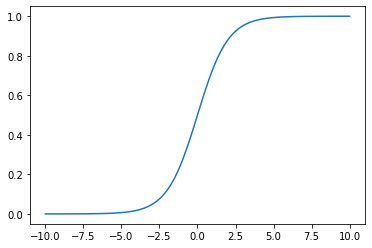

In [37]:
plt.plot(sample_z,sample_a)

In [38]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        super().__init__([z])
        
    def compute(self,z_val):
        return 1/(1+np.exp(-z_val))

In [39]:
from sklearn.datasets import make_blobs

In [40]:
data = make_blobs(n_samples=100,n_features=2,centers=2,random_state=75)

In [41]:
data

(array([[ 7.61931252e+00,  9.25367084e+00],
        [ 8.62924727e+00,  7.95324031e+00],
        [ 7.58264275e+00,  8.70372438e+00],
        [ 1.31977821e+00, -7.27106670e+00],
        [ 2.41247647e+00, -9.99341197e+00],
        [ 8.03307900e+00,  9.14918227e+00],
        [ 1.06965742e+00, -8.16482510e+00],
        [ 8.24497700e+00,  7.84672005e+00],
        [ 1.93525980e+00, -7.17127649e+00],
        [ 7.15614551e+00,  9.19767913e+00],
        [ 3.04605603e+00, -7.50486114e+00],
        [ 8.10102654e+00,  8.75813782e+00],
        [ 7.31557237e+00,  9.14404937e+00],
        [ 3.42929482e+00, -7.80419369e+00],
        [ 1.37717651e+00, -1.02226348e+01],
        [-2.66966481e-01, -8.00678506e+00],
        [ 1.82608307e+00, -5.36968617e+00],
        [ 6.85275523e+00,  9.19926872e+00],
        [ 9.56869106e-01, -7.91238745e+00],
        [ 8.24102706e-01, -1.02285428e+01],
        [ 1.96322881e+00, -9.50169117e+00],
        [ 8.59328012e+00,  8.93859056e+00],
        [ 9.33986161e+00,  7.506

In [42]:
type(data)

tuple

In [43]:
data[1]

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [44]:
features = data[0]
labels = data[1]

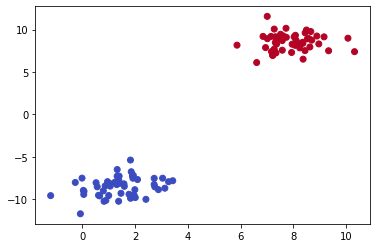

In [45]:
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')

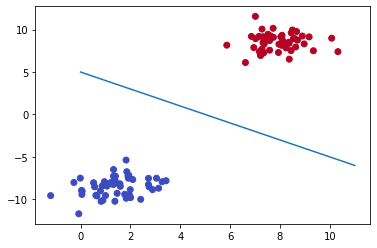

In [46]:
x = np.linspace(0,11,10)
y = -x + 5
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)

In [47]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [48]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [49]:
g = Graph()

In [50]:
g.set_as_default()

In [51]:
x = Placeholder()

In [52]:
w = Variable([1,1])

In [53]:
b = Variable(-5)

In [54]:
z = add(matmul(w,x),b)

In [55]:
a = Sigmoid(z)

In [56]:
sess = Session(z)

In [58]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.999997739675702

In [59]:
sess.run(operation=a,feed_dict={x:[2,-10]})

2.2603242979035746e-06